## CS5242 Neural Networks and Deep Learning
## Sem 2 2024/25
### Lecturer: Xavier Bresson
### Teaching Assistants: Liu Nian, Liu Ziming, Liu Xiaokang, Yan Zehong, Chew KinWhye

## Midterm exam, coding test
Date: Mar 3 2025 <br>
Time: 6:45pm-8:15pm (90min) <br>

*Instructions* <br>
Name: Please, add your name here : KOH KAI YIT<br>
Answers: Please write your answers directly in this notebook by completing the code sections marked with  
`# YOUR CODE STARTS HERE`  
`# YOUR CODE` (it can span one or multiple lines)  
`# YOUR CODE ENDS HERE`. <br>
Remark: Ensure your code runs without errors. No points will be awarded for buggy or incomplete code.  
Remark: If certain conditions of the questions (for eg. hyperparameter values) are not stated, you are free to choose anything you want.  


## Exercise 1 : Implement Softmax function and Cross-entropy loss.

The softmax function converts a vector of real numbers into a probability distribution vector, and the cross-entropy loss measures the difference between two probability distributions by quantifying how well the predicted probability distribution matches the true labels.

Your task is to implement these two basic functions by yourself without using PyTorch, TensorFlow, or any built-in softmax or cross-entropy loss functions. You can use either loop or tensor computation to implement.

Ensure that the final output is "Well Done!".

Input:

`x`: A 2D tensor of shape (batch_size, vector_length), representing the intermediate output vectors from a neural network.

`y`: A 2D tensor of the same shape (batch_size, vector_length), where each row is a one-hot vector indicating the correct class.

Output:

`my_softmax(x)`: A 2D tensor of the same shape (batch_size, vector_length), where each row represents the probability distribution.

`my_cross_entropy(x, y)`: A single float, representing the average cross-entropy loss over the batch.

*Example*:

Input:

```python
x = torch.Tensor([[2.0, 1.0, 0.1],
                  [1.0, 3.0, 0.2]])

y = torch.Tensor([[1, 0, 0],
                  [0, 1, 0]])
```

Output:
```python
my_softmax(x) = torch.Tensor([[0.659, 0.242, 0.099],
                              [0.106, 0.873, 0.021]])

my_cross_entropy(x, y) = 0.648 # approximately
```
**Hints**:

`torch.exp(x):` Returns a new tensor with the exponential of the elements of the input tensor (shape unchanged).

`torch.log(x):` Returns a new tensor with the natural logarithm of the elements of input (shape unchanged).

`torch.sum(x, dim, keepdim):` Returns the sum of elements in the input tensor `x`. The `dim` argument specifies the dimension along which the sum will be computed. The `keepdim` argument, a boolean, determines whether the output tensor will retain the reduced dimension. If `keepdim=True`, the output tensor will have the same number of dimensions as the input, with the summed dimension being of size 1. If `keepdim=False` (the default), the reduced dimension is squeezed (i.e., removed) from the output.

In [24]:
%reset -f
import datetime
import torch
import numpy as np

def my_softmax(x):
    ##########################
    # YOUR CODE STARTS HERE
    exp_x = torch.exp(x)
    result = exp_x/ torch.sum(exp_x, dim = 1, keepdim=True)
    
    # Compute softmax
    return result
    # YOUR CODE ENDS HERE
    ##########################

def my_cross_entropy(x, y):
    probs = my_softmax(x)
    ##########################
    # YOUR CODE STARTS HERE
    rows, columns = x.size()
    results = 0
    for i in range(rows):
        correct_idx = (y[i].argmax().item())
        results += -1*torch.log(probs[i, correct_idx])
    return results/rows
    # YOUR CODE ENDS HERE
    ##########################

def my_nll_loss(log_probs, targets):
    """
    log_probs: Tensor of shape (N, C) containing log-probabilities for each class
    targets: Tensor of shape (N,) containing the indices of the correct class for each sample
    Returns:
    loss: Scalar tensor representing the average negative log-likelihood loss
    """
    N = log_probs.size(0)
    
    # Select the log-prob of the correct class for each sample
    correct_log_probs = log_probs[torch.arange(N), targets]
    
    # Negative mean
    loss = -correct_log_probs.mean()
    
    return loss

def my_cross_entropy(x, y):
    """
    x: Tensor of shape (N, C) containing the raw scores (logits) for each class
    y: Tensor of shape (N, C) containing the one-hot encoded true labels
    Returns:
    loss: Scalar tensor representing the average cross-entropy loss
    """
    if y.dim() == 1: # If y is not one-hot encoded (e.g. [0, 1, 0, 0, 1, 2]), convert it to one-hot encoding
        y = torch.nn.functional.one_hot(y, num_classes=x.size(1))
    log_probs = torch.log(my_softmax(x))
    return my_nll_loss(log_probs, y.argmax(dim=1))

print('Timestamp:',datetime.datetime.now().strftime("%y-%m-%d--%H-%M-%S"))


Timestamp: 26-03-01--16-24-57


In [25]:
# You must run this cell, but you don't need to expand it if you'd prefer not to see the details.

batch_size = 4
vector_length = 5

x = torch.randn(batch_size, vector_length)
y = torch.zeros(batch_size, vector_length)
y[torch.arange(batch_size), torch.randint(0, vector_length, (batch_size,))] = 1  # One-hot encoding

torch_softmax = torch.softmax(x, dim=1)
torch_cross_entropy = torch.nn.CrossEntropyLoss()(x, y.argmax(dim=1)).item()

if torch.allclose(my_softmax(x), torch_softmax) and abs(my_cross_entropy(x, y) - torch_cross_entropy) < 1e-6:
    print("Well Done!")
else:
    print("Try again.")


Well Done!


## Exercise 2 : Implement the 2D Max Pooling layer.
Your task is to implement nn.MaxPool2d() function (Lecture05 lab02) without using using any built-in Pytorch MaxPool2d modules. For simplicity, the shape of input data is (width, height), where we do not consider batch size and channel size.

Ensure that the final output is "Well Done!".

**Hints**:

`torch.max(x):` Returns the maximal value (scalar number) of a tensor matrix x. 


In [ ]:
%reset -f
import datetime
import torch
import numpy as np

class MaxPool2d:
    def __init__(self, pooling_size):
        # pooling_size: an integer
        self.pooling_size = pooling_size

    def do_pooling(self, data):
        # Shape of data: (width, height)
        temp_data = data.numpy()
        width, height = data.shape
        ##########################
        # YOUR CODE STARTS HERE
        stride = self.pooling_size
        output_size = width // self.pooling_size
        output_matrix = np.zeros((output_size, output_size))

        # Perform pooling
        for i in range(width):
            for j in range(height):
                # Extract pooling region
                region = data[i * stride: i * stride + self.pooling_size, j * stride: j * stride + self.pooling_size]
                # print(region)
                # Apply pooling operation
                output_matrix[i, j] = np.max(region)

        result = torch.Tensor(output_matrix)
        # YOUR CODE ENDS HERE
        ##########################
        return result

print('Timestamp:',datetime.datetime.now().strftime("%y-%m-%d--%H-%M-%S"))


In [ ]:
# You must run this cell, but you don't need to expand it if you'd prefer not to see the details.

import torch
import torch.nn as nn

rand_pool_size = torch.randint(5, 10, (1,)).item()
sample_data = torch.rand(1, 1, 4*rand_pool_size, 5*rand_pool_size)
mod = nn.MaxPool2d(rand_pool_size, rand_pool_size)
test_mod = MaxPool2d(rand_pool_size)
true_pool = mod(sample_data)[0,0]
test_pool = test_mod.do_pooling(sample_data[0, 0])
if (true_pool-test_pool).sum() < 1e-9:
    print("Well Done!")
else:
    print("Try again.")


## Exercise 3 : Implement MLP with sigmoid activation.

Implement a simple two-layer multi-layer perceptron (MLP) in PyTorch without using the pre-built modules `torch.nn.Linear()` or `torch.nn.Sigmoid()`.

For the first hidden linear layer, use a weight tensor W1 with shape (in_features, hidden_size) and a bias tensor b1 with shape (hidden_size,).

For the output linear layer, employ a weight tensor W2 with shape (hidden_size, out_features) and a bias tensor b2 with shape (out_features,).

The activation after the hidden linear layer is the sigmoid function defined as: $\textrm{sigmoid}(x) = 1 / (1 + \exp(-x))$.

**Hints**:

`torch.exp(x):` Returns a new tensor with the exponential of the elements of the input tensor (shape unchanged).



In [ ]:
%reset -f
import datetime
import torch

class MyMLP:
    """
    A simple MLP with one hidden layer using manual matrix multiplication
    and manual sigmoid, without torch.nn.Linear or torch.sigmoid.
    """
    def __init__(self, input_dim, hidden_dim, output_dim):
        # Weights and biases are randomly initialized with :
        #  1) Hidden layer: (input_dim  -> hidden_dim)
        #  2) Output layer: (hidden_dim -> output_dim)
        self.W1 = torch.randn(input_dim, hidden_dim, requires_grad=False)
        self.b1 = torch.randn(hidden_dim, requires_grad=False)
        self.W2 = torch.randn(hidden_dim, output_dim, requires_grad=False)
        self.b2 = torch.randn(output_dim, requires_grad=False)

    def sigmoid(self, x):
        return 1 / (1 + torch.exp(-x))
    
    def relu(self, x):
        return torch.maximum(torch.zeros_like(x), x)

    def forward(self, x):
        """
        Forward pass through:
            hidden = sigmoid(W1 * x + b1)
            output = W2 * hidden + b2
        """
        ##########################
        # YOUR CODE STARTS HERE
        print(self.W1.shape)
        print(x.shape) # N, D
        h = x @ self.W1 + self.b1
        h = self.sigmoid(h)
        out = h @ self.W2 + self.b2
        # YOUR CODE ENDS HERE
        ##########################
        return out

print('Timestamp:',datetime.datetime.now().strftime("%y-%m-%d--%H-%M-%S"))


Timestamp: 26-03-01--16-41-26


In [52]:
# You must run this cell, but you don't need to expand it if you'd prefer not to see the details.

class ReferenceMLP(torch.nn.Module):
    """
    Reference MLP using official PyTorch modules for comparison.
    """
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = torch.nn.Linear(input_dim, hidden_dim, bias=True)
        self.sigmoid = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        hidden = self.sigmoid(self.fc1(x))
        return self.fc2(hidden)

# We set the same dimensions
input_dim, hidden_dim, output_dim = 5, 10, 2

# Create random input data
torch.manual_seed(0)
x = torch.randn(4, input_dim)

# Create our MLP
my_mlp = MyMLP(input_dim, hidden_dim, output_dim)

# Create the reference MLP
ref_mlp = ReferenceMLP(input_dim, hidden_dim, output_dim)

# Copy parameters from the reference MLP to our MLP for a fair comparison
with torch.no_grad():
    my_mlp.W1[:] = ref_mlp.fc1.weight.data.T
    my_mlp.b1[:] = ref_mlp.fc1.bias.data
    my_mlp.W2[:] = ref_mlp.fc2.weight.data.T
    my_mlp.b2[:] = ref_mlp.fc2.bias.data

# Get outputs
my_output = my_mlp.forward(x)
ref_output = ref_mlp(x)

# Compare
diff = (my_output - ref_output).abs().max().item()
# print("Difference:", diff)

# Check if the difference is very small
if diff < 1e-7:
    print("Well Done!")
else:
    print("Try again.")


torch.Size([5, 10])
torch.Size([4, 5])
Well Done!


## Exercise 4 : Implement a training loop for a two-layer MLP.

In this exercise, you will implement a training loop for a two-layer Multi-Layer Perceptron using built-in Pytorch functions. The model will be trained on a small part of the CIFAR-10 dataset, which consists of 2,500 training labeled images and 500 test labeled images across 10 classes. Your goal is to complete the missing parts of the code and ensure the training loop functions correctly.

### Your tasks
1.	Dataset Splitting:
	- The small CIFAR training dataset contains 2,500 samples.
	- You need to further split this into 2,000 samples for training and 500 samples for validation.
    - The original test data of 500 samples is unchanged.
3.	Model Implementation:
  - Implement a class for the two-Layer MLP model.
  - The architecture should follow the following structure: Linear → ReLU → Linear.
3.	Training Loop Completion:
	- Implement the training loop that optimizes the model.

After training, the trained model must achieve below 65% error rate on the test set. Ensure that the final output is "Well Done!".


In [53]:
# You must run this cell, but you don't need to expand it if you'd prefer not to see the details.

%reset -f
import datetime

# Prerequisites: Load Necessary Libraries and Functions
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from random import randint
import time
import matplotlib.pyplot as plt
import os
import pickle

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

def get_error(scores, labels):
    bs=scores.size(0)
    predicted_labels = scores.argmax(dim=1)
    indicator = (predicted_labels == labels)
    num_matches=indicator.sum()
    return 1-num_matches.float()/bs

def eval_on_test_set(data, label, batch_size=1, split='test'):
    running_error = 0
    num_batches = 0
    for i in range(0, data.shape[0],batch_size):
        minibatch_data =  data[i:i+batch_size]
        minibatch_label = label[i:i+batch_size]
        inputs = minibatch_data.view(batch_size, torch.flatten(data, start_dim=1).shape[1])
        scores=net(inputs)
        error = get_error(scores, minibatch_label)
        running_error += error.item()
        num_batches+=1
    total_error = running_error/num_batches
    print( f'{split} error  = ', total_error*100 ,'percent')
    return total_error


### Data Splitting

We split the original training dataset (2,500 samples) into:
- Training set: 2,000 samples used for model learning.
- Validation set: 500 samples used for learning rate tuning (and reducing overfitting).

The original test 500 samples remain unchanged for final model evaluation.

After performing the split, the expected output should match the following sizes :
```
train_data: torch.Size([2000, 3, 32, 32])
train_label: torch.Size([2000])
val_data: torch.Size([500, 3, 32, 32])
val_label: torch.Size([500])
test_data: torch.Size([500, 3, 32, 32])
test_label: torch.Size([500])
```

**Hints**:

`torch.randperm(N):` Returns a random permutation of integers from 0 to N - 1.


In [54]:
# Load the CIFAR data
with open('datasets/small_CIFAR.pkl',"rb") as f:
    train_data, train_label, test_data, test_label = pickle.load(f)

# Define split sizes
train_size = 2000
val_size = 500

##########################
# YOUR CODE STARTS HERE
# Generate random permutation of 2,500 indices
shuffled_indices = torch.randperm(train_size+val_size)
# Select the first 2,000 indices for training and the remaining 500 for evaluation
train_indices = shuffled_indices[:2000]
val_indices =  shuffled_indices[2000:]
# Use the indices to create the training and validation sets
val_data = train_data[val_indices]
val_label = train_label[val_indices]
train_data = train_data[train_indices]
train_label = train_label[train_indices]
# YOUR CODE ENDS HERE
##########################

print(f"train_data: {train_data.size()}")
print(f"train_label: {train_label.size()}")
print(f"val_data: {val_data.size()}")
print(f"val_label: {val_label.size()}")
print(f"test_data: {test_data.size()}")
print(f"test_label: {test_label.size()}")


train_data: torch.Size([2000, 3, 32, 32])
train_label: torch.Size([2000])
val_data: torch.Size([500, 3, 32, 32])
val_label: torch.Size([500])
test_data: torch.Size([500, 3, 32, 32])
test_label: torch.Size([500])


### Model Implementation

Implement a two-Layer MLP model with the class `two_layer_net()`.

The architecture should follow the structure: Linear → ReLU → Linear.

**Hints**: You may use modules `nn.Linear()` and `nn.ReLU()`.


In [55]:
class two_layer_net(nn.Module):
    """
    A two-layer fully-connected neural network with ReLU nonlinearity.
    We assume an input dimension of 'input_size', a hidden dimension of 'hidden_size',
    and perform classification over C classes ('output_size').
    The architecure should be linear layer - relu layer - linear layer.
    """
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        # Define layers explicitly using pytorch modules
        ##########################
        # YOUR CODE STARTS HERE
        self.layer1 = nn.Linear( input_size   , hidden_size  , bias=True)
        self.layer2 = nn.Linear(  hidden_size , output_size  , bias=True)
        # YOUR CODE ENDS HERE
        ##########################

    def forward(self, x):
        ##########################
        # YOUR CODE STARTS HERE
        x = self.layer1(x)
        x = torch.relu(x)
        x = self.layer2(x)
        # YOUR CODE ENDS HERE
        ##########################
        return x


### Implement the training loop that optimizes the model's parameters.

Code the training loop:

1.	Shuffle the training set at each epoch.
  
1.	Process the mini-batches of data:

	- Forward pass: Computes model prediction and loss value.
    - Backward pass: Computes gradients of loss with respect to parameters.
	- Updates the parameters using SGD optimizer.
    - Track training error.
&nbsp;
1.	Track validation error. If validation error does not decrease, then reduce the learning rate by a factor of 1.2.

After training, the trained model must achieve beyond 65% error rate on the test set.

You are free to select the initial learning rate, the batch size, the number of epochs, or anything else that is useful to achieve the target test error.


net:  two_layer_net(
  (layer1): Linear(in_features=3072, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=10, bias=True)
)
val error  =  83.19999933242798 percent
test error  =  80.0 percent
epoch= 0  time= 2.6383931636810303  loss= 2.2743449091911314  error= 0.0 percent lr= 0.1
----------------------------------------------------------------------------------------------------
val error  =  90.79999923706055 percent
test error  =  89.79999899864197 percent
epoch= 1  time= 2.8768420219421387  loss= 2.1568297386169433  error= 0.0 percent lr= 0.08333333333333334
----------------------------------------------------------------------------------------------------
val error  =  77.8000009059906 percent
test error  =  76.20000004768372 percent
epoch= 2  time= 3.1612818241119385  loss= 2.143884140253067  error= 0.0 percent lr= 0.08333333333333334
----------------------------------------------------------------------------------------------------
val error  =  84.

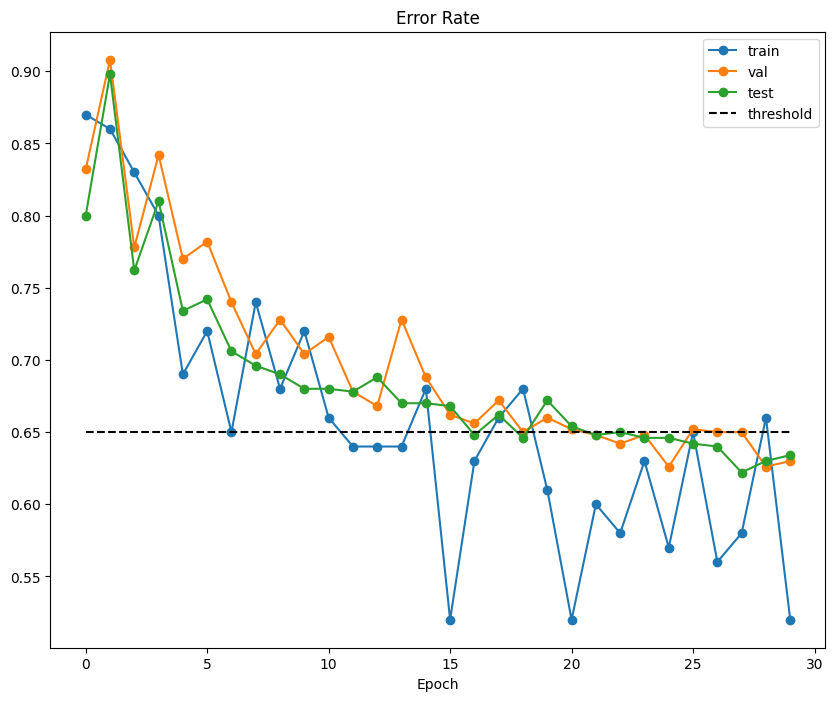

Well Done!


In [64]:
# Initialize the two-layer neural network
reshaped_input_size = torch.flatten(train_data, start_dim=1).shape[1] # calculate the input size, equal to 3*32*32 = 3072
net = two_layer_net(reshaped_input_size, 100, 10)
print('net: ',net)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Set batch size for mini-batch gradient descent
bs = 100

start = time.time()

# Set initial learning rate
lr = 1e-1

loss_history = []
train_error_history = []
val_error_history = []
test_error_history = []
val_error_best = 100

# create a new optimizer at the beginning of each epoch: give the current learning rate.
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

num_epochs = 30
for epoch in range(num_epochs):

    running_loss = 0
    running_error = 0
    num_batches = 0

    ##########################
    # YOUR CODE STARTS HERE
    shuffled_indices = torch.randperm(train_data.size(0))
    # YOUR CODE ENDS HERE
    ##########################

    for count in range(0, train_data.shape[0], bs):

        ##########################
        # YOUR CODE STARTS HERE

        # Zero out gradients to avoid accumulation from previous iterations
        optimizer.zero_grad()

        # Select a mini-batch of training data and corresponding labels
        indices = shuffled_indices[count: count+bs]
        minibatch_data = train_data[indices]
        minibatch_label = train_label[indices]

        # Reshape input data to match the expected input format of the network
        inputs = minibatch_data.view(bs, 3*32*32)

        # Enable gradient tracking for inputs
        inputs.requires_grad_()

        # Forward pass: compute predictions (scores) using the neural network
        scores = net(inputs)
        # Compute loss using the defined loss function
        loss = criterion(scores, minibatch_label)
        # Backward pass: compute gradients
        loss.backward()

        # Update network parameters based on gradients
        optimizer.step()
        # Accumulate loss (detached to prevent computation graph issues)
        running_loss += loss.detach().item()
        # Compute error rate for the current batch
        error = get_error(scores.detach(), minibatch_label)

        # YOUR CODE ENDS HERE
        ##########################

        # Store loss history for later visualization
        loss_history.append(loss.detach().item())

        # Increment batch counter
        num_batches += 1

    # Once the epoch is finished we divide the "running quantities"
    # by the number of batches to get the mean quantities over an epoch
    total_loss = running_loss/ num_batches
    total_error = running_error/ num_batches
    elapsed_time = time.time() - start

    # Compute the error rate on the val set and test set
    val_error = eval_on_test_set(val_data, val_label, batch_size=bs, split='val')
    test_error = eval_on_test_set(test_data, test_label, batch_size=bs, split='test')

    # If validation error does not decrease, then reduce the learning rate by a factor
    if val_error < val_error_best:
        val_error_best = val_error
    else:
        ##########################
        # YOUR CODE STARTS HERE
        lr = lr/1.2
        optimizer = torch.optim.SGD(net.parameters(), lr=lr)
        # YOUR CODE ENDS HERE
        ##########################

    # Display stats for every epoch and store new quantities
    print('epoch=',epoch, ' time=', elapsed_time,
          ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
    print('-'*100)
    train_error_history.append(error)
    val_error_history.append(val_error)
    test_error_history.append(test_error)


print('Timestamp:',datetime.datetime.now().strftime("%y-%m-%d--%H-%M-%S"))

# Visualize train / val / test error
plt.figure()
plt.title('Error Rate')
plt.plot(train_error_history, '-o', label='train')
plt.plot(val_error_history, '-o', label='val')
plt.plot(test_error_history, '-o', label='test')
plt.plot([0.65] * len(val_error_history), 'k--', label='threshold')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Check if the difference is very small
if min(test_error_history) < 0.65:
    print("Well Done!")
else:
    print("Try again.")


## Exercise 5 : Implement the 2D convolutional layer.

The exercise's goal is to implement the 2D convolution function without using any built-in pytorch convolution functions.

For simplicity, we assume that there is no padding and the stride value is 1.

Ensure that the final output is "Well Done!".

*Inputs*:

`x`: A 4D tensor of shape (batch_size, num_channel, image_height, image_width), representing a batch of input images.

`K`: A 4D tensor of shape (num_kernel, num_channel, kernel_height, kernel_width) representing the kernels to process the image.

*Outputs*:

`my_conv2d(x, K)`: A 4D tensor of the same shape (batch_size, num_kernel, image_height, image_width).

**Grading**:

Using more than 4 "for loops" will not give you any marks.

Using 4 "for loops" will give you 33% of the marks.

Using 3 "for loops" will give you 66% of the marks.

Using 2 "for loops" will give you the full 100%.

**Useful Functions**:

`x.size():` Returns the size of the tensor.

`torch.zeros(*size): ` Returns a tensor filled with the scalar value 0, with the shape defined by the variable argument size.

`torch.flatten(input, start_dim=0, end_dim=-1):` Flattens input by reshaping it into a one-dimensional tensor. If start_dim or end_dim are passed, only dimensions starting with start_dim and ending with end_dim are flattened. The order of elements in input is unchanged.

`torch.unsqueeze(input, dim): `Returns a new tensor with a dimension of size one inserted at the specified position.

**Hints**:

Pytorch supports *broadcasting* which is useful for vectorized operations, for example:
```python
x = torch.Tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]]) # Shape of (3, 3)
y = torch.Tensor([[2, 2, 2]]) # Shape of (1, 3)

print(x*y) # Returns [[2, 4, 6], [8, 10, 12], [14, 16, 18]]
```

The y tensor matches the x tensor on the second dimension (both values are 3). However, the y tensor does not match the x tensor on the first dimension (1 vs. 3). Pytorch automatically repeats the y tensor across the first dimension to match the shape of x. More generally, pytorch can broadcast two tensors if for each dimension, either the value matches or the value of one of the tensors is 1. For example, pytorch can broadcast:
```python
x = torch.rand(1, 50, 1, 50, 50, 30)
y = torch.rand(30, 1, 50, 1, 50, 30)

print(x*y) # Size of (30, 50, 50, 50, 50, 30)
```


In [ ]:
%reset -f
import datetime
import torch

def my_conv2d(x, K):
    ##########################
    # YOUR CODE STARTS HERE
    # Get dimensions
    input_size = x.shape[0]
    kernel_size = K.shape[0]

    # Pad the input matrix
    padded_input = np.pad(x, pad_width=padding, mode='constant', constant_values=0)

    # Compute output dimensions
    output_size = ((input_size - kernel_size + 2 * padding) // stride) + 1

    # Initialize output matrix
    output_matrix = np.zeros((output_size, output_size))

    # Perform convolution
    for i in range(0, output_size):
        for j in range(0, output_size):
            # Extract region of input
            region = padded_input[i * stride:i * stride + kernel_size, j * stride:j * stride + kernel_size]
            # Apply convolution (element-wise multiplication and sum)
            output_matrix[i, j] = np.sum(region * k)

    return output_matrix
    return out
    # YOUR CODE ENDS HERE
    ##########################


In [ ]:
# You must run this cell, but you don't need to expand it if you'd prefer not to see the details.

import torch

x1 = torch.randint(100, (4, 3, 28, 28)) # Batch of input images
K1 = torch.randint(100, (8, 3, 3, 3))

x2 = torch.randint(100, (4, 3, 32, 32)) # Batch of input images
K2 = torch.randint(100, (8, 3, 5, 5))

print('Timestamp:',datetime.datetime.now().strftime("%y-%m-%d--%H-%M-%S"))

if (my_conv2d(x1, K1) - torch.nn.functional.conv2d(x1, K1, bias=None, stride=1, padding=0)).abs().max().item() + (my_conv2d(x2, K2) - torch.nn.functional.conv2d(x2, K2, bias=None, stride=1, padding=0)).abs().max().item()< 1e-6:
    print("Well Done!")
else:
    print("Try again.")


## End of coding test